In [1]:
# Import Dependencies
import csv
import pandas as pd
import numpy as np
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import os
#Connecting the driver
from google.colab import drive

drive.mount('/content/drive/')

root_dir = '/content/drive/MyDrive/DAP/python_scripts'

Mounted at /content/drive/


In [2]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score

# Load your data from a CSV file
# Replace 'your_dataset.csv' with the actual path or URL of your dataset
df = pd.read_csv(os.path.join(root_dir,'training_dataset_final.csv'),encoding='ISO-8859-1')



# Identify features (X) and target variable (y)
X = df.drop('disease', axis=1)  # Adjust 'target_variable' to your actual target variable name
y = df['disease']

# Convert target variable to label encoding
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


from sklearn.model_selection import train_test_split

# Assuming X and y are your feature matrix and target variable
X_train, X_temp, y_train, y_temp = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Split the remaining data into validation and test sets
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the shapes of the resulting sets
print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_valid.shape, y_valid.shape)
print("Test set:", X_test.shape, y_test.shape)




Training set: (8668, 404) (8668,)
Validation set: (1858, 404) (1858,)
Test set: (1858, 404) (1858,)


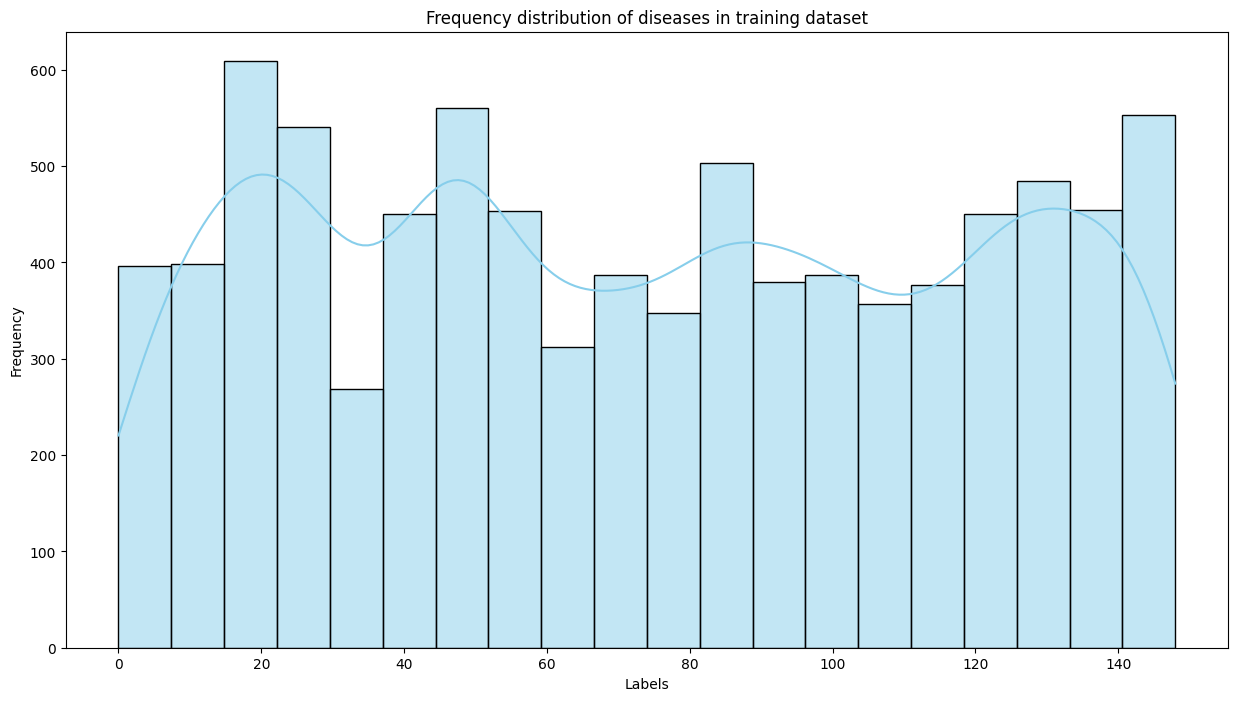

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split


# Convert Y_train to a Pandas Series
Y_train_series = pd.Series(y_train)

# Count the frequency of each label in Y_train
label_counts = Y_train_series.value_counts()

# Create a histogram using Seaborn
plt.figure(figsize=(15, 8))
sns.histplot(data=Y_train_series, color='skyblue', edgecolor='black', kde=True)
plt.title('Frequency distribution of diseases in training dataset')
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.show()

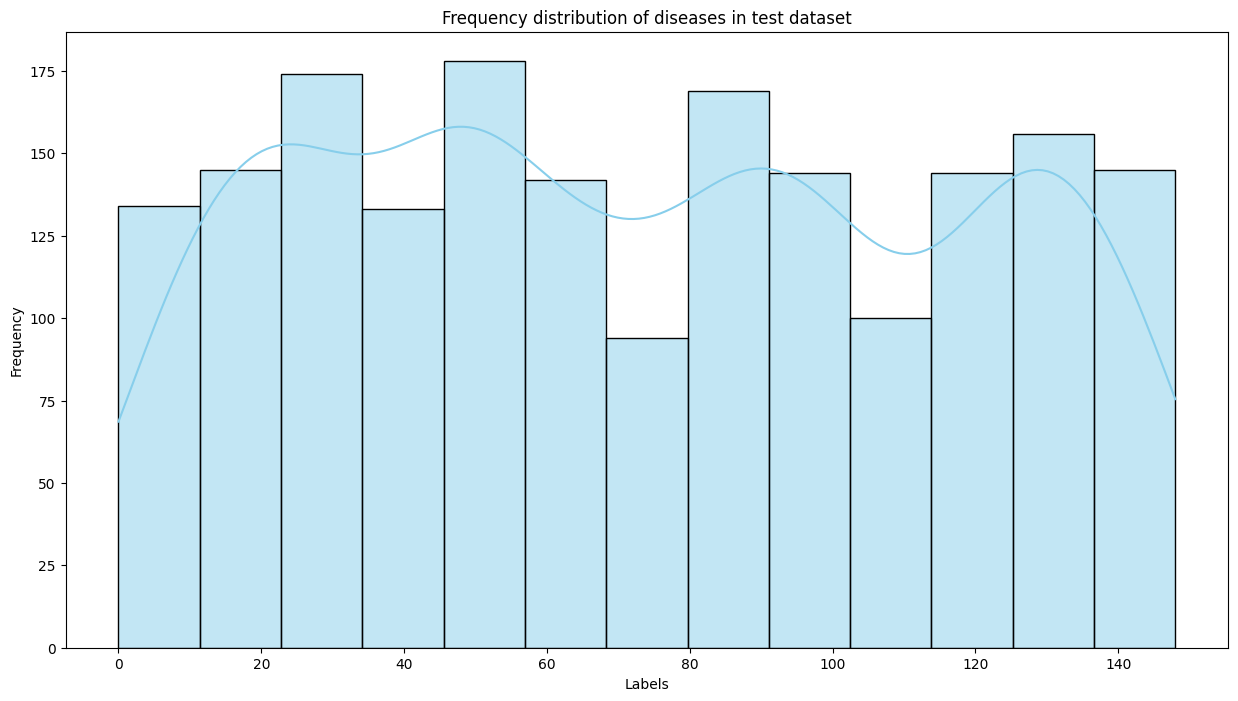

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split


# Convert Y_train to a Pandas Series
Y_train_series = pd.Series(y_test)




# Create a histogram using Seaborn
plt.figure(figsize=(15, 8))
sns.histplot(data=Y_train_series, color='skyblue', edgecolor='black', kde=True)
plt.title('Frequency distribution of diseases in test dataset')
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.show()

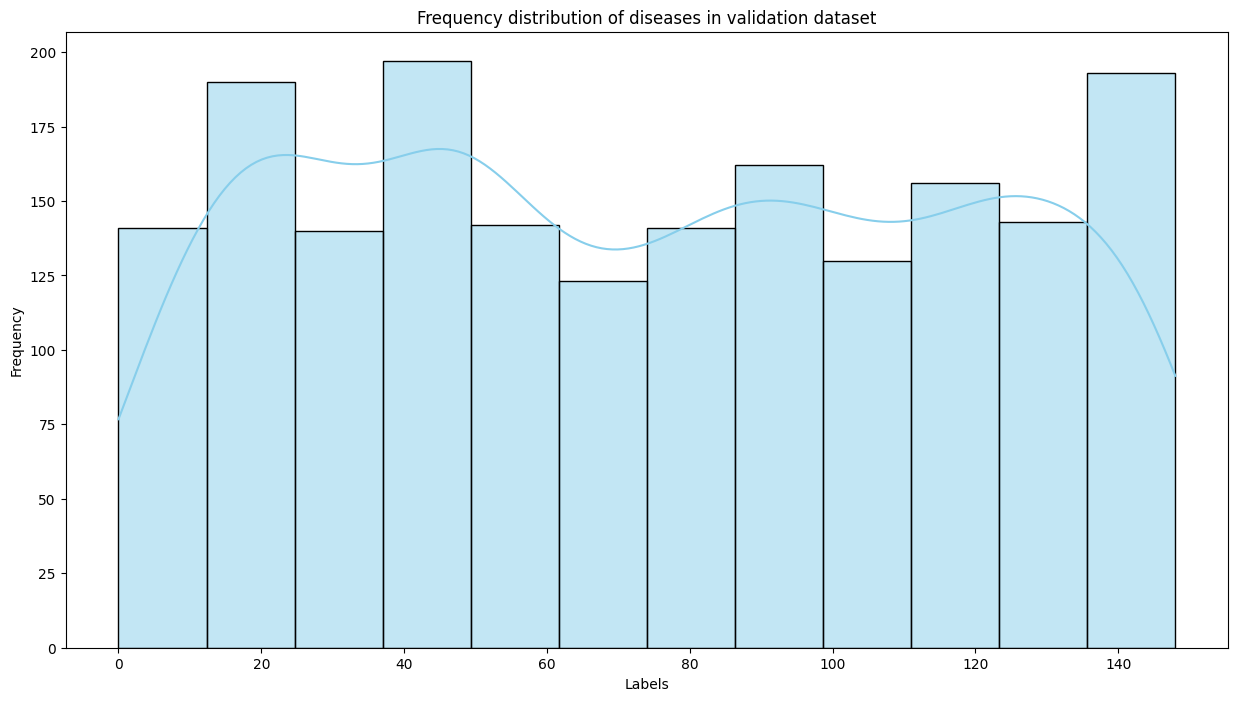

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split


# Convert Y_train to a Pandas Series
Y_train_series = pd.Series(y_valid)




# Create a histogram using Seaborn
plt.figure(figsize=(15, 8))
sns.histplot(data=Y_train_series, color='skyblue', edgecolor='black', kde=True)
plt.title('Frequency distribution of diseases in validation dataset')
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.show()

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv(os.path.join(root_dir,'Transformed_data.csv'))

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

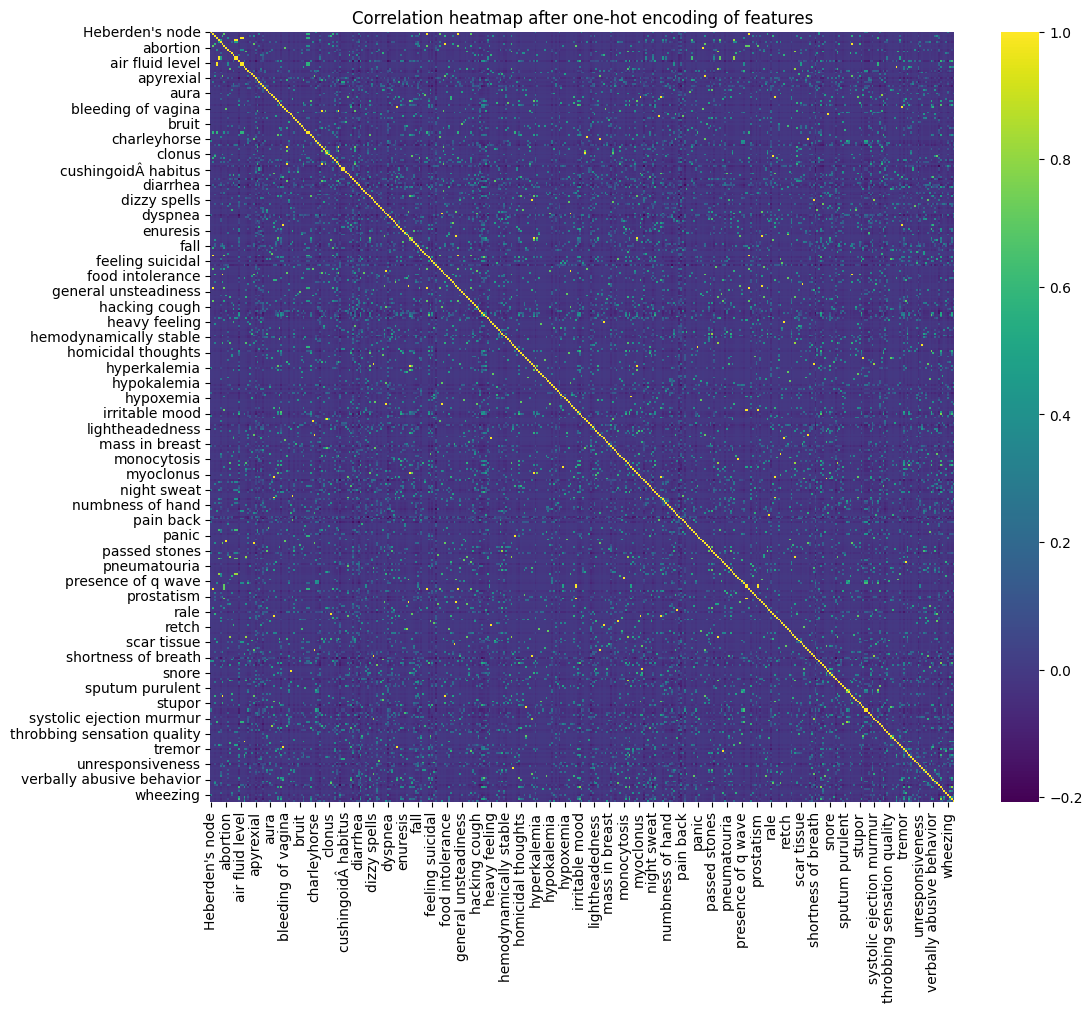

In [12]:
corr_matrix = df.iloc[:, 1:].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
plt.title('Correlation heatmap after one-hot encoding of features')
sns.heatmap(corr_matrix, cmap='viridis', cbar=True, annot=False)
plt.show()

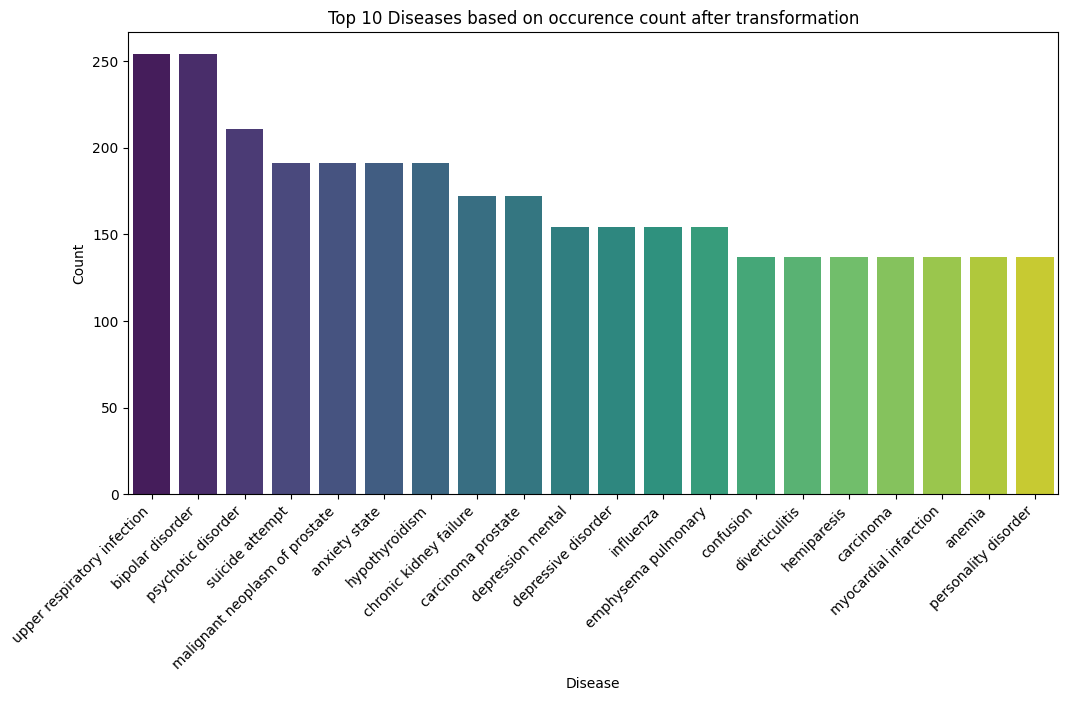

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and 'disease' is the column containing disease labels
df = pd.read_csv(os.path.join(root_dir,'training_dataset_final.csv'),encoding='ISO-8859-1')
df = df.fillna(0)
# Get the top 10 diseases based on count
top_diseases = df['disease'].value_counts().nlargest(20)

# Plot the top diseases using countplot
plt.figure(figsize=(12, 6))
sns.countplot(x=df['disease'], order=top_diseases.index, palette='viridis')
plt.title('Top 10 Diseases based on occurence count after transformation')
plt.xlabel('Disease')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

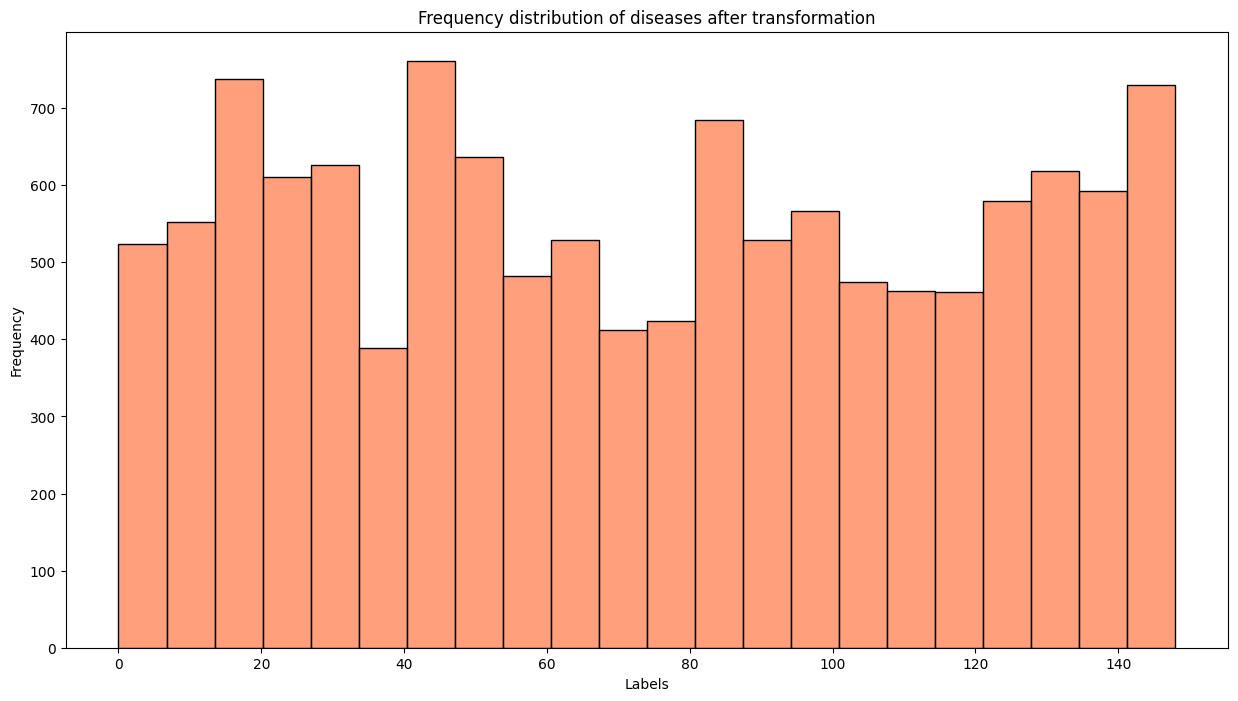

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split


# Convert Y_train to a Pandas Series
Y_train_series = pd.Series(y_valid)




# Create a histogram using Seaborn
plt.figure(figsize=(15, 8))
sns.histplot(data=y_encoded, color='#FF7F50', edgecolor='black')
plt.title('Frequency distribution of diseases after transformation')
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.show()

In [17]:
#!pip install umap
!pip install umap-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 9.6 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86831 sha256=9b4b6abf6fa348151fee2f2ea206a2b4ca59673552d5e2df958115203798b5df
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


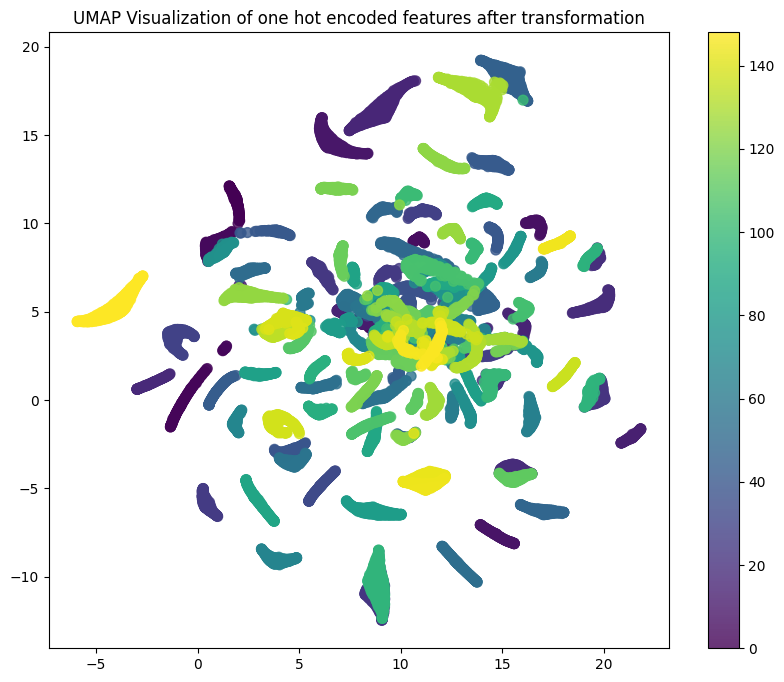

In [22]:
import pandas as pd
import umap
import matplotlib.pyplot as plt

# Assuming X is your feature matrix
# You may need to replace this with your actual feature matrix
reducer = umap.UMAP(n_components=2, random_state=42)
X= X.fillna(0) #-- Yukta
X_umap = reducer.fit_transform(X)

# Create a scatter plot for UMAP
plt.figure(figsize=(10, 8))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y_encoded, cmap='viridis', s=50, alpha=0.8)
plt.title('UMAP Visualization of one hot encoded features after transformation')
plt.colorbar()
plt.show()


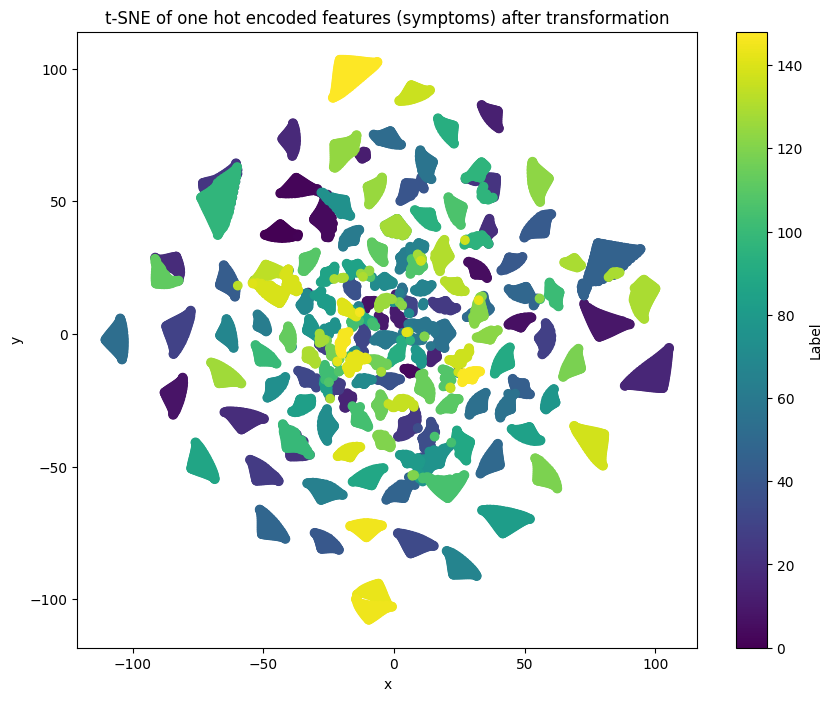

In [25]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)

# Fit and transform the data
X_tsne = tsne.fit_transform(X)

# Create a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_encoded, cmap='viridis')
plt.title('t-SNE of one hot encoded features (symptoms) after transformation')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(label='Label')
plt.show()

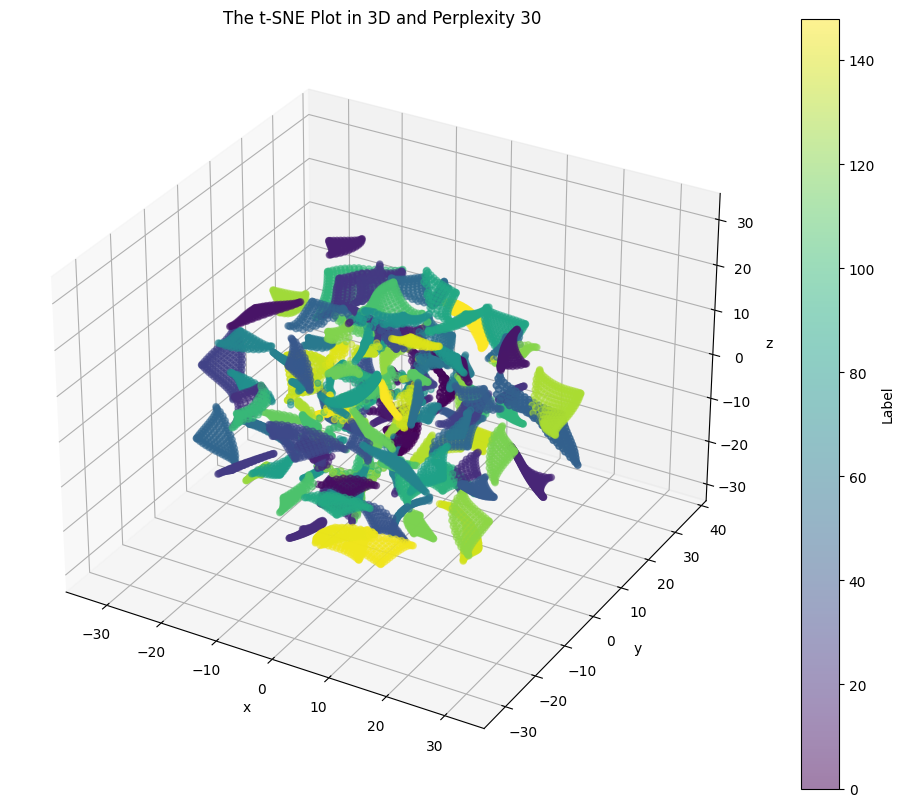

In [24]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE

# Assuming X_encoded is your feature matrix after one-hot encoding
# X_encoded = ...

# Create a t-SNE model with three components (3D visualization)
tsne = TSNE(n_components=3, random_state=42, perplexity=30)  # You can experiment with perplexity

# Fit and transform the data
X_tsne = tsne.fit_transform(X)

# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], c=y_encoded, cmap='viridis', alpha=0.5)  # Adjust alpha for transparency
ax.set_title('The t-SNE Plot in 3D and Perplexity 30')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
fig.colorbar(scatter, label='Label')
plt.show()
